In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# main function
class MLP():
    def __init__(self,L,m, lr = 0.001, max_epochs = 800000, batch_size = 1):
        # network parameters
        self.lr = lr # learning rate
        self.max_epochs = max_epochs # maximum number of iterations
        self.batch_size = batch_size # batch size of input of each training process
        self.m = m # number of neurons in each hidden layer
        self.L = L # number of hidden layers
        
    def init_params(self, X):
        # initialize parameters
        np.random.seed(0) # set a seed
        self.n, self.p = X.shape[0], X.shape[1] # shape of input matrix
        self.W, self.b = [], [] # use list to store parameters
        self.W.append(np.random.randn(self.p, self.m[0])*0.01) # initialize the first layer
        self.b.append(np.random.randn(self.m[0])) 
        for i in range(self.L-1): # initialize the L-1 hidden layers
            self.W.append(np.random.randn(self.m[i], self.m[i+1])*0.01)
            self.b.append(np.random.randn(self.m[i+1])*0.01)
        self.W.append(np.random.randn(self.m[self.L-1], 1)*0.01) # initialze the output layer
        self.b.append(np.random.randn(1)) 
        
    def net(self,X):
        # forward propagation
        H,A = [],[] # use list to store output of each layer
        H.append(X@self.W[0] +self.b[0])
        A.append(Relu(H[0])) # output of the first layer
        for i in range(self.L-1): # output of the L-1 hidden layers
            H.append(A[i]@self.W[i+1] +self.b[i+1])
            A.append(Relu(H[i+1]))
        output = A[self.L-1]@self.W[self.L] +self.b[self.L] # output of the last layer
        return H,A,output
        
    def back_prop(self,x,y,H,A,output):
        # backward propagation
        s = []
        Ms = []
        err = (y - output.reshape(y.shape)).reshape(-1,1)
        s.append(-2*err)
        for i in range(self.L):
            Ms.append(d_Relu(H[i]))
        for j in range(self.L):
            s.append(np.multiply(np.dot(s[j],self.W[self.L-j].T),Ms[self.L-j-1]))
        for k in range(self.L):
            self.W[self.L-k] = self.W[self.L-k] - self.lr*np.dot(A[self.L-k-1].T,s[k]).reshape(self.W[self.L-k].shape)/len(y)
            self.b[self.L-k] = self.b[self.L-k] - self.lr*s[k].mean(0).reshape(self.b[self.L-k].shape)
        self.W[0] = self.W[0] - self.lr*np.dot(x.T,s[self.L]).reshape(self.W[0].shape)/len(y)
        self.b[0] = self.b[0] - self.lr*s[self.L].mean(0).reshape(self.b[0].shape)
        
    def train(self,X,Y):
        self.train_loss=[] # record training acc
        self.MSE_rec =[] # record test error
        self.init_params(X) # initialize the model
        for epoch in range(self.max_epochs):
            for x, y in data_iteration(self.batch_size, X, Y): # Iterate over each data batch
                H,A,output = self.net(x) # feeding forward
                self.back_prop(x,y,H,A,output) # backpropagating
            _,_,output = self.net(X)
            l = square_loss(Y,output).mean() # calculate the mean square error over all observations
            self.train_loss.append(l)
            if (epoch+1)%100 == 0:
                print(f'epoch {epoch + 1}, loss {l:f}') # print the training loss
        
def square_loss(y,y_hat):
    return (y-y_hat.reshape(y.shape))**2/2

def data_iteration(batchSize, X, y): # data iteration
    n = len(y)
    index = list(range(n))
    np.random.shuffle(index)
    for i in range(0, n, batchSize):
        batch_index = index[i:min(n, i+batchSize)]
        yield X[batch_index], y[batch_index]
        
#other functions        
## activation functions
def Relu(X):
    a = np.zeros_like(X)
    return np.maximum(X,a)

## derivative of activation functions
def d_Relu(x):
    return np.where(x >= 0, 1, 0)

In [3]:
# Generate Training data
from scipy.stats import multivariate_normal
def X_data_generation(r, samples, features):
    a = np.zeros((features, features))
    b = a.copy()
    
    for i in range(features):
        a[i, :] = i + 1
    
    for j in range(features):
        b[:, j] = j + 1
    
    dc = r**np.abs(a - b)
    mean_vector = np.zeros(dc.shape[0])
    X = multivariate_normal.rvs(mean=mean_vector, cov=dc, size=samples)
    
    return X

def beta_initiate(features):
    s = np.concatenate((np.linspace(1, 2.9, features), np.linspace(-2.9, -1, features)))
    theta = np.matrix(np.random.choice(s, size=features)).T
    theta[4, 0] = 1.1
    
    return theta

def Y_data_generation(X, beta):
    ebr = np.random.normal(0, 1, size=(X.shape[0],1))
    Y = X@beta + ebr
    return Y

In [4]:
# generate training data
r = 0.5
samples = 30
features = 50

X = X_data_generation(r, samples, features)
init_beta = beta_initiate(features)
y = Y_data_generation(X, init_beta)
#y = np.array(y).reshape(len(y))

In [5]:
X.shape,y.shape,y.reshape(-1)

((30, 50),
 (30, 1),
 matrix([[-17.27997576, -12.02533561,   6.32280532,  -6.11454187,
          -11.1628653 , -14.77199027,   8.0557885 ,   5.50175379,
           10.06039916, -13.42994727, -25.70198232,  -8.72004167,
            3.90907822, -13.56524503,  11.73206354,  -2.41696724,
            4.25393725,  24.08826726,  -2.90005337,   8.51032029,
           -3.5403868 ,  -0.77719714,   4.71768022,  -3.67598322,
          -15.11245905,   0.9455235 ,   5.87896038,   9.44850625,
           -8.04743958, -11.59325757]]))

In [6]:
start_time = time.time()
# initialize MLP
mlp = MLP(batch_size=2,max_epochs= 1000,lr=0.001,L=1,m=[20])
# train the model
mlp.train(np.array(X),np.array(y))
end_time = time.time()

epoch 100, loss 0.352957
epoch 200, loss 0.009861
epoch 300, loss 0.000010
epoch 400, loss 0.000000
epoch 500, loss 0.000000
epoch 600, loss 0.000000
epoch 700, loss 0.000000
epoch 800, loss 0.000000
epoch 900, loss 0.000000
epoch 1000, loss 0.000000


In [7]:
execution_time = end_time - start_time
print(f"代码执行时间为: {execution_time} 秒")

代码执行时间为: 1.5406432151794434 秒


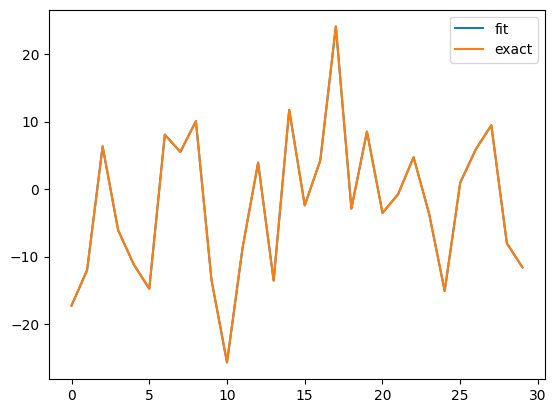

In [8]:
# fitted value vs exact value at t1
_,_,H3 = mlp.net(X)
plt.figure()
plt.plot(H3,label="fit")
plt.plot(np.array(y),label="exact")
plt.legend()

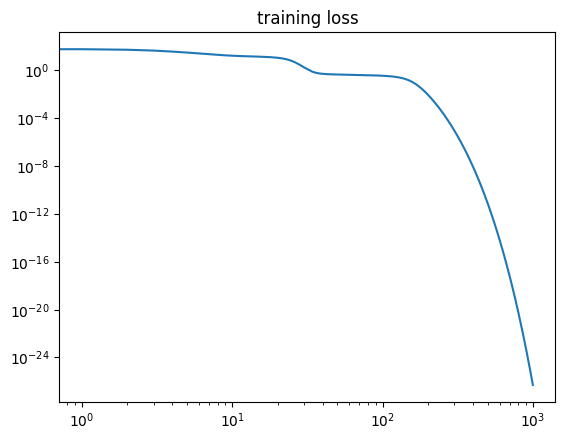

In [9]:
# training loss vs epochs
plt.figure()
all_figures = []
plt.loglog(np.array(mlp.train_loss))
plt.title('training loss')
all_figures.append(plt.gcf())